<img src="../images/GA-logo.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Data and Kaggle Challenge

**Primary Learning Objectives:**

1. Creating and iteratively refining a regression model
2. Using Kaggle to practice the modeling process
3. Providing business insights through reporting and presentation.

We will clean the data and build a regression model based on Singapore Housing Dataset to predict the price of a house at sale.

This jupyter notebook focuses on cleaning the dataset

----

### Contents:
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
- [Clean Data Export](#Clean-Data-Export)
----

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_cleaning import check_vif, get_outliers_idx

%matplotlib inline

----

## Data Import and Cleaning

In [2]:
# read data
housing_df=pd.read_csv("../datasets/train.csv")

# set display to larger because of detailed dataset
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

# quick look at data
housing_df.head()

C:\Users\fishe\AppData\Local\Temp\ipykernel_16948\3626946493.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  housing_df=pd.read_csv("../datasets/train.csv")


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [4]:
# set index for easier manipulation
housing_df.set_index('id', inplace=True)

In [5]:
# rename all column names to lower case
housing_df.columns=housing_df.columns.str.strip().str.lower() 

### Explore characteristics of dataset variables

In [6]:
housing_df.describe()

,floor_area_sqm,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,150634.00000,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,149805.000000,57845.000000,125208.000000,148694.000000,150634.000000,53244.000000,89766.000000,121432.000000,150634.00000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,97.19763,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,7.248370,9.321275,8.284823,1046.235290,28.551536,15.139816,1990.922906,124.683312,0.138813,1.782055,39.219366,50.083978,26.299853,5.940770,0.023972,0.448564,0.063678,0.622516,0.059409,0.000339,1.366224,103.839391,664.239826,1.269237,2.149623,5.236486,1173.700148,1.382672,2.358766,4.704122,48.65298,58.138322,765.007872,0.546364,0.264024,1.365667,103.839400,115.258966,1.366231,103.839369,395.172974,55.368190,0.113195,1.366268,103.839106,508.533220,210.146428,0.031879,1.365986,103.839340
std,24.40304,12.138829,1.433076e+05,2.752396,3.345468,5.508074,5.515155,5.507364,5.508074,262.674321,12.138829,6.232492,12.202185,58.349670,5.947970,11.713826,68.748273,45.302101,33.456575,19.131872,1.135483,5.350617,2.028341,11.193820,0.669842,0.024305,0.042850,0.072506,368.739209,0.624275,1.287372,3.453332,1076.701337,0.652205,1.630609,3.955697,19.13878,55.495519,429.366039,0.497847,0.440814,0.042563,0.072582,55.572855,0.042865,0.072520,234.760931,17.903918,0.316832,0.042669,0.072637,309.066265,20.010489,0.175677,0.042599,0.072630
min,31.00000,1966.000000,1.500000e+05,2012.000000,1.000000,2.000000,1.000000,3.000000,2.000000,333.684000,2.000000,2.000000,1949.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270380,103.685228,0.000000,1.000000,1.000000,1.000000,1.873295,1.000000,1.000000,1.000000,0.00000,0.000000,21.971410,0.000000,0.000000,1.265982,103.697143,9.001285,1.270759,103.684206,45.668324,20.000000,0.000000,1.274962,103.687724,38.913475,188.000000,0.000000,1.276029,103.687207
25%,75.00000,1984.000000,3.470000e+05,2014.000000,4.000000,5.000000,4.000000,6.000000,5.000000,807.300000,20.000000,12.000000,1983.000000,90.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.336285,103.774859,391.473823,1.000000,1.000000,3.000000,372.132398,1.000000,1.000000,1.000000,40.00000,0.000000,458.266301,0.000000,0.000000,1.336358,103.773982,75.032491,1.336405,103.774414,227.083164,44.000000,0.000000,1.337289,103.773754,290.285883,188.000000,0.000000,1.337545,103.776008
50%,95.00000,1992.000000,4.200000e+05,2017.000000,7.000000,8.000000,7.000000,9.000000,8.000000,1022.580000,29.000000,13.000000,1989.000000,112.000000,0.000000,0.000000,0.000000,

### Numeric variables

- `lease_commence_date`: looks ok, from 1966 to 2019, but not a variable of interest since length of remaining lease is more important based on literature
- `resale_price`: this is the outcome variable. No missing values, and data looks reasonable (prices around \\$15k to \\$1.258m)
- `tranc_year`: looks ok too (runs from 2012 to 2021), no missing values
- `tranc_month`: looks ok too (runs from Jan to Dec), no missing values
- `mid_storey`, `lower`, `upper`, `mid`: all looks ok, no missing values, likely only one or two will be used since they refer to the min, median, middle and max of the `storey_range` variable
- `floor_area_sqft`: no missing values and range looks reasonable (300 sqft to 3,000 sqft)
- `hdb_age`: no missing values, range also looks reasonable, can be considered as a proxy to number of numbers of lease left if that is not available
- `max_floor_lvl`: no missing values, highest hdb is 50 floors, slightly suspicious, to explore further if this is used as a predictor variable
- `year_completed`: no missing values, likely high correlation with hdb_age, will check if used, and likely only need one or the other
- `total_dwelling_units`: no missing values, the lower end looks suspicious, that the hdb only has 2 units? Will explore if this is used as a predictor variable
- `1/2/3/4/5room/exec/multigen/studio_apartment_sold/rental`: no missing values, but variation looks very small, e.g. most are either 0 or the same number, suggesting that the entire block is the same layout. This also means predictive value of these variables are likely low. To KIV, although rental potential might have an influence on resale price logically
- `latitude/longitude`: no missing values, looks reasonably within Singapore's boundaries, could be used as for specific location but there are other variables with more predictive power, e.g. planning area. To KIV
- `mall_nearest_distance`: **829 missing values**, may need to interpolate based on long/lat if this variable is used. In addition, minimum of zero is suspicious, since no hdb is colocated with a mall. To explore further if this is used
- `mall_within_500m/1km/2km`: count of number of malls within radius, useful aggregation and predictor variable. **Missing values likely indicate no malls but may need sanity check (i.e. cannot be no mall within 1km but have mall within 500m)**
- `hawker*` variables: similar to `mall` variables **with missing values**, potentially good predictor but (1) need to decide whether to use distance or count, and (2) need to check on missing values. In addition, number of food and market stalls may have an effect as well and should be used as a interaction variable with nearest distance since they are high correlated with presence of hawker centre
- `mrt/bus` variables: similar to `mall` variables with the added benefit that there are no missing values
- `pri_sch/sec_sch` variables: no missing values, but distance, vacancy and afflication have different effects, may need to use all carefully. Range of variables look reasonable. Cutoff point for `sec_sch` is a good proxy for 'desirability' of the school

In [7]:
# check out the object dtype variables
housing_df.describe(include='object')

,tranc_yearmonth,town,flat_type,block,street_name,storey_range,flat_model,full_flat_type,address,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,postal,planning_area,mrt_name,bus_stop_name,pri_sch_name,sec_sch_name
count,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634,150634
unique,110,26,7,2514,553,25,20,43,9157,1,2,2,2,2,17483,32,94,1657,177,134
top,2018-07,JURONG WEST,4 ROOM,2,YISHUN RING RD,04 TO 06,Model A,4 ROOM Model A,"91, TANGLIN HALT RD",Y,N,N,N,N,142091,Jurong West,Punggol,Blk 121,Marsiling Primary School,Bendemeer Secondary School
freq,2088,11451,61136,579,2451,34699,46261,35127,106,150634,121815,150619,150592,150499,80,11451,7671,774,2075,3384


### Object variables
- `tranc_yearmonth`: not important, will use separate year month variables to capture time effects
- `town`: 26 towns, looks ok, likely to use this variable or planning area or both
- `flat_type`, `flat_model`, `full_flat_type`: nothing suspicious, will use one of them after checking
- `block`, `street_name`, `address`: not very useful, but good to know
- `storey_range`: root variable for numeric variables about the storey range, likely to use numeric variables given that this will create 25 dummy variables with higher risk of overfitting...
- `residential`: useless, since no variation
- `commerical`: indication of co-location, which may explain why 0 distance to mall for some units
- `market_hawker`: indication of co-location with hawker centre or market, if distance variables are used, likely duplciated
- `multistorey_carpark`, `precinct_pavilion`: useful, will include, but may need to regularise to prevent overfitting. To note this
- `postal`: useful for imputing missing values if needed, curious that it is no int, which suggests there are errors. To explore if used
- `planning area`: like `town` variable, will double check before using. There are more planning areas than towns, so more variation likely better predictive power
- `mrt_name`, `bus_stop_name`: useless
- `pri/sec_sch_name`: potential impact if famous schools, but cutoff point is a good proxy -> as a feature to be engineered (e.g. use cutoff points and sch name to band schools?)

### Examine multicollinearity

Noting that some of the variables look very correlated and may mean similar things, there is a good chance they are collinear. To improve model, we aim to remove variables that are collinear and only leave one of those variables in each set


#### `hdb_age` and `lease_commence_date`

In [8]:
# examining hdb_age, lease_commence_date
check_vif(housing_df[['hdb_age', 'lease_commence_date']])

,variables,vif
1,lease_commence_date,6.349301
0,hdb_age,6.349301


Observation:

- vif > 5, seriously consider keeping only one of the 2 variables. Choose `hdb_age` which is easier for users to wrap minds around

#### `flat_type`, `flat_model` and `full_flat_type`

In [9]:
# examining flat_type, flat_model and full_flat_type
pd.set_option('display.max_rows', 100)
check_vif(pd.get_dummies(housing_df[['flat_type', 'flat_model', 'full_flat_type']]))

C:\ProgramData\Anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
3,flat_type_4 ROOM,4.542592e+02
14,flat_model_Model A,4.637938e+02
48,full_flat_type_4 ROOM Premium Apartment,7.788121e+02
4,flat_type_5 ROOM,9.195979e+02
56,full_flat_type_5 ROOM Improved,1.607630e+03
11,flat_model_Improved,1.696642e+03
19,flat_model_Premium Apartment,3.062340e+03
2,flat_type_3 ROOM,4.749351e+03
45,full_flat_type_4 ROOM Model A,5.718399e+03
37,full_flat_type_3 ROOM New Generation,6.828583e+03


Observation:

- all vif > 5, seriously consider keeping only one of the 3 variables. Choose full_flat_type for more complete coverage

#### `storey_range`, `mid_storey`, `lower`, `mid` and `upper`

In [10]:
# examining
vif_df = housing_df[['storey_range', 'mid_storey', 'lower', 'mid', 'upper']]
vif_df = pd.get_dummies(vif_df, columns=['storey_range'])

check_vif(vif_df)

C:\ProgramData\Anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,mid_storey,inf
26,storey_range_43 TO 45,inf
25,storey_range_40 TO 42,inf
24,storey_range_37 TO 39,inf
23,storey_range_36 TO 40,inf
22,storey_range_34 TO 36,inf
21,storey_range_31 TO 35,inf
20,storey_range_31 TO 33,inf
19,storey_range_28 TO 30,inf
18,storey_range_26 TO 30,inf


Observation:

- all vif Inf, seriously consider keeping only one of the variables. Choose `mid` for a numeric variable and middle of each storey range for easier interpretation

#### `planning_area` and `town`

In [11]:
# examining 
check_vif(pd.get_dummies(housing_df[['planning_area', 'town']]))

C:\ProgramData\Anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
12,planning_area_Hougang,9.140412e+03
8,planning_area_Choa Chu Kang,2.938397e+04
56,town_WOODLANDS,2.783465e+05
37,town_BUKIT PANJANG,3.047207e+05
5,planning_area_Bukit Panjang,3.490823e+05
26,planning_area_Tampines,4.570316e+05
57,town_YISHUN,2.193689e+06
3,planning_area_Bukit Batok,3.368789e+06
2,planning_area_Bishan,4.710307e+06
43,town_HOUGANG,7.484742e+06


Observation:

- vif > 5, seriously consider keeping only one of the 2 variables. Choose `planning_area` to capture more variation in the data

### Examine missing values

Noting that some of the variables have missing values, we look and decide how to impute them (actual imputing will be done after train-test-split to avoid information leakage)

#### `mall_nearest_distance` and `mall_within_500m/1km/2km`

In [12]:
# check what proportion of variable is null
housing_df['mall_nearest_distance'].isnull().mean()

0.005503405605640161

In [13]:
# check whether all mall related variables are null when the mall_nearest_distance variable is null
housing_df.loc[housing_df['mall_nearest_distance'].isnull(), 
               ['mall_within_500m', 'mall_within_1km', 'mall_within_2km']].sum()

mall_within_500m    0.0
mall_within_1km     0.0
mall_within_2km     0.0
dtype: float64

Observations:

- Only 0.5% is null and all the other mall variables are also null for these datapoints, so we technically can drop these data points
- But that is logically a waste because we have the long/lat of each HDB which can be used to impute the distance to the nearest mall, so we will do that to avoid losing data
- After imputing, we will then fill the `mall_within_500m/1km/2km` variables based on the imputed distance


In [14]:
# check why other mall_within_XX variables are null
# this check is for malls within 2km but mall_within_2km is null
housing_df.loc[(housing_df['mall_nearest_distance'] > 2000.0) & (housing_df['mall_within_2km'].isnull()), 
               ['mall_within_500m', 'mall_within_1km', 'mall_within_2km']].agg(['count', 'sum'])

,mall_within_500m,mall_within_1km,mall_within_2km
count,0.0,0.0,0.0
sum,0.0,0.0,0.0


In [15]:
# check why other mall_within_XX variables are null
# this check is for malls within 1km but mall_within_1km is null
housing_df.loc[(housing_df['mall_nearest_distance'] > 1000.0) & (housing_df['mall_within_1km'].isnull()), 
               ['mall_within_500m', 'mall_within_1km', 'mall_within_2km']].agg(['count', 'sum'])

,mall_within_500m,mall_within_1km,mall_within_2km
count,0.0,0.0,23486.0
sum,0.0,0.0,108573.0


In [16]:
# check why other mall_within_XX variables are null
# this check is for malls within 500mm but mall_within_500m is null
housing_df.loc[(housing_df['mall_nearest_distance'] > 500.0) & (housing_df['mall_within_500m'].isnull()), 
               ['mall_within_500m', 'mall_within_1km', 'mall_within_2km']].agg(['count', 'sum'])

,mall_within_500m,mall_within_1km,mall_within_2km
count,0.0,67363.0,90849.0
sum,0.0,123130.0,442473.0


Observations:

- Nothing too surprising here. This suggests that the missing values in the `mall_within_500m/1km/2km` represent 0, except for the datapoints with missing values for `mall_nearest_distance`
- We will impute all missing values to 0 after imputing the missing `mall_nearest_distance`
- This will be done at the modelling stage to avoid info leakage


#### `hawker_within_500m/1km/2km`

In [17]:
# check why hawker_within_XX variables are null
# this check is for hawker within 2km but hawker_within_2km is null
housing_df.loc[(housing_df['hawker_nearest_distance'] > 2000.0) & (housing_df['hawker_within_2km'].isnull()), 
               ['hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']].agg(['count', 'sum'])

,hawker_within_500m,hawker_within_1km,hawker_within_2km
count,0.0,0.0,0.0
sum,0.0,0.0,0.0


In [18]:
# check why hawker_within_XX variables are null
# this check is for hawker within 1km but hawker_within_1km is null
housing_df.loc[(housing_df['hawker_nearest_distance'] > 1000.0) & (housing_df['hawker_within_1km'].isnull()), 
               ['hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']].agg(['count', 'sum'])

,hawker_within_500m,hawker_within_1km,hawker_within_2km
count,0.0,0.0,31666.0
sum,0.0,0.0,59909.0


In [19]:
# check why hawker_within_XX variables are null
# this check is for hawker within 500m but hawker_within_500m is null
housing_df.loc[(housing_df['hawker_nearest_distance'] > 500.0) & (housing_df['hawker_within_500m'].isnull()), 
               ['hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']].agg(['count', 'sum'])

,hawker_within_500m,hawker_within_1km,hawker_within_2km
count,0.0,36522.0,68188.0
sum,0.0,51378.0,197722.0


Observations:

- Again nothing too surprising here. This suggests that the missing values in the `hawker_within_500m/1km/2km` represent 0
- We will impute all missing values to 0 now


In [20]:
# fill all hawker missing values with 0
housing_df['hawker_within_500m'].fillna(0, inplace=True)
housing_df['hawker_within_1km'].fillna(0, inplace=True)
housing_df['hawker_within_2km'].fillna(0, inplace=True)

### Examine outliers

We take a brief look at the outliers in numeric variables and discuss if these are of concern

In [21]:
# check for floor_area_sqft
housing_df[get_outliers_idx(housing_df['floor_area_sqft'])]
# Observations: just the executive and multi-gen units, should leave, but potentially need to split as a separate group for prediction

,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
67125,2015-09,WOODLANDS,EXECUTIVE,808,WOODLANDS ST 81,10 TO 12,189.0,Apartment,1994,798000.0,2015,9,11,10,12,11,EXECUTIVE Apartment,"808, WOODLANDS ST 81",2034.396,27,12,1985,Y,N,N,N,N,72,0,0,6,6,0,60,0,0,0,0,0,0,730808,1.442281,103.786916,Woodlands,692.119048,NaN,2.0,6.0,1091.025481,0.0,0.0,3.0,52,112,577.773293,Woodlands,1,1,1.437094,103.787225,31.506034,Blk 808,1.442563,103.786945,160.645700,Qihua Primary School,48,0,1.442036,103.788340,205.057334,Riverside Secondary School,230,0,1.441078,103.788314
64414,2013-11,WOODLANDS,EXECUTIVE,402,WOODLANDS ST 41,07 TO 09,177.0,Apartment,1995,735000.0,2013,11,8,7,9,8,EXECUTIVE Apartment,"402, WOODLANDS ST 41",1905.228,26,12,1985,Y,N,N,N,N,62,0,0,6,4,10,42,0,0,0,0,0,0,730402,1.431064,103.772259,Woodlands,876.171122,NaN,1.0,3.0,891.406184,0.0,1.0,2.0,70,0,268.533032,Marsiling,0,0,1.432757,103.773982,95.926713,Blk 402,1.431890,103.772008,406.285043,Marsiling Primary School,54,0,1.434423,103.773698,544.076771,Fuchun Secondary School,188,0,1.430834,103.777148
28091,2015-03,KALLANG/WHAMPOA,3 ROOM,53,JLN MA'MOR,01 TO 03,280.0,Terrace,1972,1060000.0,2015,3,2,1,3,2,3 ROOM Terrace,"53, JLN MA'MOR",3013.920,49,2,1959,Y,N,N,N,N,8,0,0,8,0,0,0,0,0,0,0,0,0,320053,1.328279,103.856097,Novena,1072.225651,NaN,NaN,9.0,572.821170,0.0,5.0,11.0,52,112,1036.395130,Toa Payoh,1,0,1.332376,103.847724,229.043227,Opp Blk 65,1.327827,103.858108,752.791589,Hong Wen School,48,0,1.321689,103.857652,678.037848,Bendemeer Secondary School,188,0,1.324611,103.860970
146002,2021-03,BISHAN,EXECUTIVE,446,BRIGHT HILL DR,07 TO 09,243.0,Maisonette,1990,1092888.0,2021,3,8,7,9,8,EXECUTIVE Maisonette,"446, BRIGHT HILL DR",2615.652,31,10,1988,Y,N,N,N,N,64,0,0,0,44,14,6,0,0,0,0,0,0,570446,1.357872,103.832314,Bishan,450.118063,1.0,1.0,2.0,850.323833,0.0,1.0,5.0,31,51,1405.412952,Marymount,0,0,1.347873,103.840048,272.503251,Blk 454,1.359298,103.830321,329.618668,Ai Tong School,30,0,1.360736,103.833076,956.557404,Peirce Secondary School,208,0,1.366132,103.829910
57250,2014-07,WOODLANDS,EXECUTIVE,403,WOODLANDS ST 41,04 TO 06,177.0,Apartment,1995,700000.0,2014,7,5,4,6,5,EXECUTIVE Apartment,"403, WOODLANDS ST 41",1905.228,26,12,1985,Y,N,N,N,N,62,0,0,6,4,10,42,0,0,0,0,0,0,730403,1.430708,103.772261,Woodlands,888.855964,NaN,1.0,3.0,904.019293,0.0,1.0,2.0,70,0,297.433396,Marsiling,0,0,1.432757,103.773982,107.253296,Blk 303,1.430690,103.773226,442.833194,Marsiling Primary School,54,0,1.434423,103.773698,543.374994,Fuchun Secondary School,188,0,1.430834,103.777148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57260,2020-10,WOODLANDS,EXEC

<AxesSubplot:>

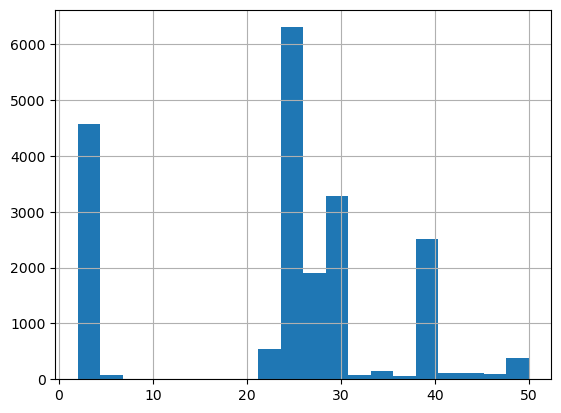

In [22]:
# check for max_floor_lvl
housing_df[get_outliers_idx(housing_df['max_floor_lvl'])]['max_floor_lvl'].hist(bins=20)
# Observations: 20k+ outliers, but either very low rise (terraces) or insanely high rise (newer HDB). Nothing suspicious, will keep

<AxesSubplot:>

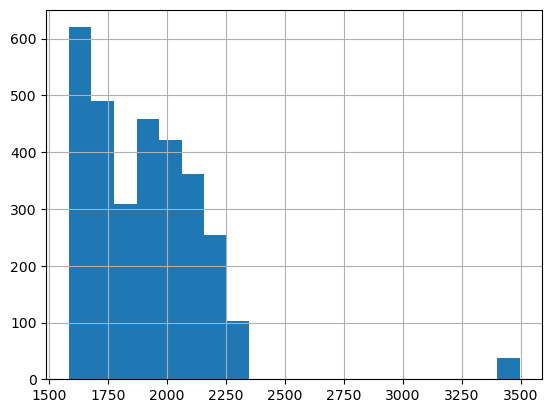

In [23]:
# check for mall_nearest_distance
housing_df[get_outliers_idx(housing_df['mall_nearest_distance'])]['mall_nearest_distance'].hist(bins=20)
# Observations: nothing surprising, other than the few that is 3.5km away from mall. To keep all

<AxesSubplot:>

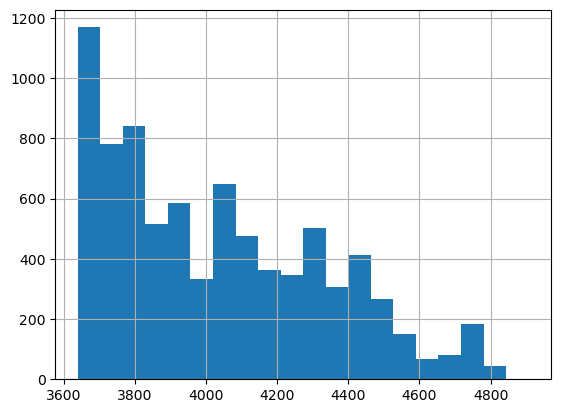

In [24]:
# check for hawker_nearest_distance
housing_df[get_outliers_idx(housing_df['hawker_nearest_distance'])]['hawker_nearest_distance'].hist(bins=20)
# Observations: again not too surprising, distribution looks nicer. To keep all

<AxesSubplot:>

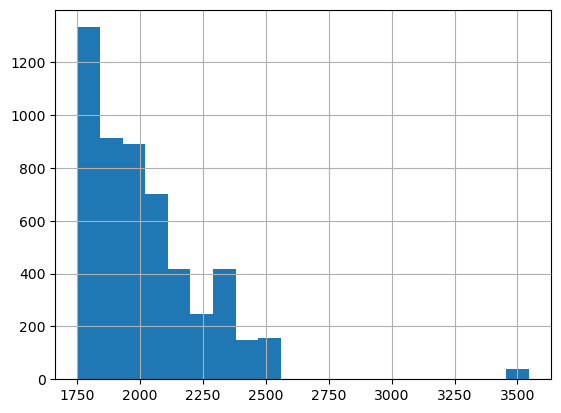

In [25]:
# check for mrt_nearest_distance
housing_df[get_outliers_idx(housing_df['mrt_nearest_distance'])]['mrt_nearest_distance'].hist(bins=20)
# Observations: nothing surprising except for the 3.5km away ones, will explore a bit further

In [26]:
# take a look at the extreme outlier
housing_df[housing_df['mrt_nearest_distance'] > 3000]
# Observations: these are changi village HDB, nothing surprising that they are far from everything. To keep all

,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13221,2019-12,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,280000.0,2019,12,5,4,6,5,3 ROOM Improved,"5, CHANGI VILLAGE RD",710.424,40,4,1978,Y,Y,N,N,N,75,0,0,74,0,1,0,0,0,0,0,0,0,500005,1.388853,103.986846,Changi,3471.145638,NaN,NaN,NaN,176.890682,1.0,1.0,1.0,87,50,3517.814536,Changi Airport,0,0,1.35722,103.987305,56.113235,Blk 4,1.388942,103.987343,3234.040079,Pasir Ris Primary School,34,0,1.372309,103.962919,3564.247736,Pasir Ris Crest Secondary School,215,0,1.372344,103.959363
13215,2017-09,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,305000.0,2017,9,5,4,6,5,3 ROOM Improved,"5, CHANGI VILLAGE RD",710.424,40,4,1978,Y,Y,N,N,N,75,0,0,74,0,1,0,0,0,0,0,0,0,500005,1.388853,103.986846,Changi,3471.145638,NaN,NaN,NaN,176.890682,1.0,1.0,1.0,87,50,3517.814536,Changi Airport,0,0,1.35722,103.987305,56.113235,Blk 4,1.388942,103.987343,3234.040079,Pasir Ris Primary School,34,0,1.372309,103.962919,3564.247736,Pasir Ris Crest Secondary School,215,0,1.372344,103.959363
48233,2017-06,PASIR RIS,3 ROOM,1,CHANGI VILLAGE RD,01 TO 03,77.0,Improved,1980,320000.0,2017,6,2,1,3,2,3 ROOM Improved,"1, CHANGI VILLAGE RD",828.828,41,4,1975,Y,Y,N,N,N,55,0,0,54,0,1,0,0,0,0,0,0,0,500001,1.388547,103.987804,Changi,3435.307130,NaN,NaN,NaN,136.383625,1.0,1.0,1.0,87,50,3483.769534,Changi Airport,0,0,1.35722,103.987305,67.559663,Blk 4,1.388942,103.987343,3303.452239,Pasir Ris Primary School,34,0,1.372309,103.962919,3638.977233,Pasir Ris Crest Secondary School,215,0,1.372344,103.959363
13217,2018-02,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,74.0,Improved,1981,330000.0,2018,2,5,4,6,5,3 ROOM Improved,"5, CHANGI VILLAGE RD",796.536,40,4,1978,Y,Y,N,N,N,75,0,0,74,0,1,0,0,0,0,0,0,0,500005,1.388853,103.986846,Changi,3471.145638,NaN,NaN,NaN,176.890682,1.0,1.0,1.0,87,50,3517.814536,Changi Airport,0,0,1.35722,103.987305,56.113235,Blk 4,1.388942,103.987343,3234.040079,Pasir Ris Primary School,34,0,1.372309,103.962919,3564.247736,Pasir Ris Crest Secondary School,215,0,1.372344,103.959363
13211,2016-09,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,01 TO 03,66.0,Improved,1981,310000.0,2016,9,2,1,3,2,3 ROOM Improved,"5, CHANGI VILLAGE RD",710.424,40,4,1978,Y,Y,N,N,N,75,0,0,74,0,1,0,0,0,0,0,0,0,500005,1.388853,103.986846,Changi,3471.145638,NaN,NaN,NaN,176.890682,1.0,1.0,1.0,87,50,3517.814536,Changi Airport,0,0,1.35722,103.987305,56.113235,Blk 4,1.388942,103.987343,3234.040079,Pasir Ris Primary School,34,0,1.372309,103.962919,3564.247736,Pasir Ris Crest Secondary School,215,0,1.372344,103.959363
13208,2015-05,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,280000.0,2015,5,5,4,6,5,3 ROOM Improved,"5, CHANGI VILLAGE RD",710.424,40,4,1978,Y,Y,N,N,N,75,0,0,74,0,1,0,0,0,0,0,0,0,500005,1.388853,103.986846,Changi,3471.145638,NaN,NaN,NaN,176.890682,1.0,1.0,1.0,87,50,3517.814536,Changi Air

----

## Clean Data Export

In [27]:
# export clean data
housing_df.to_csv('../datasets/train_cleaned.csv')